In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

## Generate Data

In [2]:
X, Y = make_blobs(n_samples=500, n_features=2, centers=2, random_state=25)
# X, Y = make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=25)
print(X.shape, Y.shape)

(500, 2) (500,)


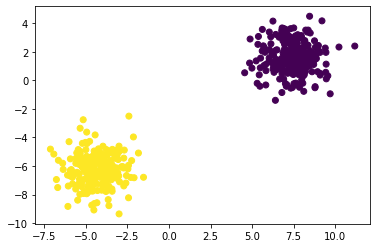

In [3]:
plt.scatter(X[:,0], X[:,1], c = Y)
plt.show()

## Model and Helper Functions

In [4]:
def sigmoid(z) :
    return (1.0) / (1 + np.exp(-z))

### Implement perceptron learning algorithm
- Learn the weights
- Reduce the loss
- Make the predictions

In [5]:
def predict(X, weights) :
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    return predictions

In [6]:
def loss(X, Y, weights) :
    Y_ = predict(X, weights)
    cost = np.mean(-Y * np.log(Y_) - (1 - Y) * np.log(1 - Y_))
    return cost

In [7]:
def update(X, Y, weights, learning_rate) :
    Y_ = predict(X, weights)
    dw = np.dot(X.T, Y_ - Y)
    
    m = X.shape[0]
    weights = weights - learning_rate * dw / (float(m))
    return weights

In [8]:
def train(X, Y, learning_rate = 0.5, maxEpochs = 100) :
    m = X.shape[0]
    
    # Modify input to handle bias
    ones = np.ones((m, 1))
    X = np.hstack((ones, X))
    
    n = X.shape[1]
    
    #Initialise weights
    weights = np.zeros(n)
    
    for epoch in range(maxEpochs) :
        weights = update(X, Y, weights, learning_rate)
        
        if epoch % 10 == 0 :
            l = loss(X, Y, weights)
            print("Epoch %3d  Loss %.4f"%(epoch, l))
            
    return weights

In [9]:
wts = train(X, Y, maxEpochs=500, learning_rate = 0.8)

Epoch   0  Loss 0.0000
Epoch  10  Loss 0.0000
Epoch  20  Loss 0.0000
Epoch  30  Loss 0.0000
Epoch  40  Loss 0.0000
Epoch  50  Loss 0.0000
Epoch  60  Loss 0.0000
Epoch  70  Loss 0.0000
Epoch  80  Loss 0.0000
Epoch  90  Loss 0.0000
Epoch 100  Loss 0.0000
Epoch 110  Loss 0.0000
Epoch 120  Loss 0.0000
Epoch 130  Loss 0.0000
Epoch 140  Loss 0.0000
Epoch 150  Loss 0.0000
Epoch 160  Loss 0.0000
Epoch 170  Loss 0.0000
Epoch 180  Loss 0.0000
Epoch 190  Loss 0.0000
Epoch 200  Loss 0.0000
Epoch 210  Loss 0.0000
Epoch 220  Loss 0.0000
Epoch 230  Loss 0.0000
Epoch 240  Loss 0.0000
Epoch 250  Loss 0.0000
Epoch 260  Loss 0.0000
Epoch 270  Loss 0.0000
Epoch 280  Loss 0.0000
Epoch 290  Loss 0.0000
Epoch 300  Loss 0.0000
Epoch 310  Loss 0.0000
Epoch 320  Loss 0.0000
Epoch 330  Loss 0.0000
Epoch 340  Loss 0.0000
Epoch 350  Loss 0.0000
Epoch 360  Loss 0.0000
Epoch 370  Loss 0.0000
Epoch 380  Loss 0.0000
Epoch 390  Loss 0.0000
Epoch 400  Loss 0.0000
Epoch 410  Loss 0.0000
Epoch 420  Loss 0.0000
Epoch 430  

In [10]:
print(wts)

[ 4.62681920e-05 -2.35078318e+00 -1.56774161e+00]


## Make predictions

In [11]:
def getPredictions(X_Test, weights, labels = True) :
    if X_Test.shape[1] != weights.shape[0] :
        ones = np.ones((X_Test.shape[0], 1))
        X_Test = np.hstack((ones, X_Test))
        
    probs = predict(X_Test, weights)
    
    if labels :
        lbl = np.zeros(probs.shape)
        lbl[probs >= 0.5] = 1
        return lbl
    else :
        return probs

## Plotting decision boundary

In [12]:
x1 = np.linspace(-8, 10, 10)
x2 = -(wts[0] + wts[1] * x1) / wts[2]

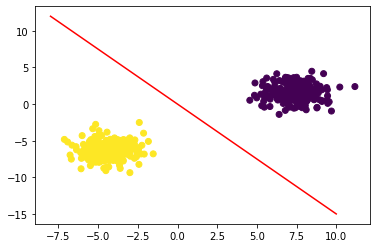

In [13]:
plt.scatter(X[:,0], X[:,1], c = Y)
plt.plot(x1, x2, c = 'red')
plt.show()

## Finding accuracy

In [14]:
Y_ = getPredictions(X, wts)
training_acc = np.sum(Y_ == Y) / Y.shape[0]
print(training_acc * 100)

100.0
